In [ ]:
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
import spotipy
import pandas as pd

SPOTIPY_CLIENT_ID = "778c83d63af643e5b0f6b0709138d46a"
SPOTIPY_CLIENT_SECRET = "55dc766368994b83a5fa327149634194"

#37i9dQZF1DX29mEFPXNhRM

from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)


#sp.user_playlist_tracks("spotify", "playlist_id")

def analyze_playlist(creator, playlist_id):

    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",
      "bpm","danceability","energy","key",
      "loudness","mode", "speechiness","instrumentalness",
      "liveness","valence","tempo", "duration",
      "time_signature"]



    playlist_df = pd.DataFrame(columns = playlist_features_list)

    # Loop through every track in the playlist, extract features and append the features to the playlist df

    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]

        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]

        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    return playlist_df




def analyze_playlist_dict(playlist_dict):

    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["genre"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = True)

    return playlist_dict_df




playlist_dict = {
    "warm_fuzzy_feeling" : ("spotify", "37i9dQZF1DX5IDTimEWoTd")
}


multiple_playlist_df = analyze_playlist_dict(playlist_dict)
print(multiple_playlist_df)

KeyError: ignored

In [ ]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials



client_credentials_manager = SpotifyClientCredentials(client_id="---", client_secret="---")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)



id = []
uri = []
song_name = []
artist_name = []
key = []
mode = []
danceability = []
energy = []
loudness = []
acousticness = []
speechiness = []
instrumentalness = []
liveness = []
tempo = []
valence = []
duration_ms = []
time_signature = []
popularity = []


def get_audio_ftrs(track_ur):
    datas = sp.audio_features(track_ur)
    for son in datas:
        id.append(son['id'])
        uri.append(son['uri'])
        key.append(son['key'])
        mode.append(son['mode'])
        danceability.append(son['danceability'])
        energy.append(son['energy'])
        loudness.append(son['loudness'])
        acousticness.append(son['acousticness'])
        speechiness.append(son['speechiness'])
        instrumentalness.append(son['instrumentalness'])
        liveness.append(son['liveness'])
        tempo.append(son['tempo'])
        valence.append(son['valence'])
        duration_ms.append(son['duration_ms'])
        time_signature.append(son['time_signature'])



def get_songs():
    for x in range(0,50):
        for track in sp.playlist_tracks(playlistids[x])["items"]:
            song_name.append(track["track"]["name"])
            popularity.append(track["track"]["popularity"])
            artist_name.append(track["track"]["artists"][0]["name"])




def get_csv():
    df = pd.DataFrame({'id': id,
                        'uri': uri,
                        'song_name':song_name,
                        'artist_name':artist_name,
                        'key': key,
                        'mode': mode,
                        'danceability': danceability,
                        'energy': energy,
                        'loudness': loudness,
                        'acousticness': acousticness,
                        'speechiness': speechiness,
                        'instrumentalness': instrumentalness,
                        'liveness': liveness,
                        'tempo': tempo,
                        'valence': valence,
                        'duration_ms': duration_ms,
                        'time_signature': time_signature,
                        'popularity':popularity
                        })

    df.to_csv('out.csv')




if __name__ == "__main__":
    spotifyid = "spotify"
    playlistids = []
    for i in range(0,500,100):
        deneme = sp.user_playlists(user=spotifyid,offset=i)["items"]
        for i in deneme:
            playlistids.append(i["uri"].split(":")[-1].split("?")[0])

    dt = pd.DataFrame({'id':playlistids})
    dt.to_csv('playlistids.csv')
    for x in range(0,50):
     get_audio_ftrs([x["track"]["uri"] for x in sp.playlist_tracks(playlistids[x])["items"]])
    get_songs()
    get_csv()

KeyboardInterrupt: ignored

Accuracy: 0.929545
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       873
           1       0.96      0.90      0.93       887

    accuracy                           0.93      1760
   macro avg       0.93      0.93      0.93      1760
weighted avg       0.93      0.93      0.93      1760

ROC AUC Score: 0.9814463983387379


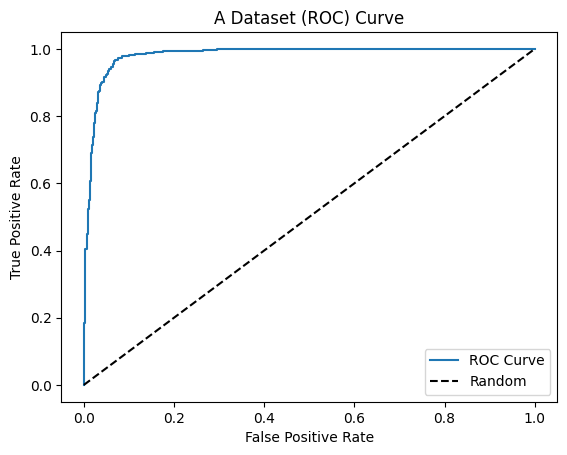

Confusion Matrix:
[[838  35]
 [ 89 798]]


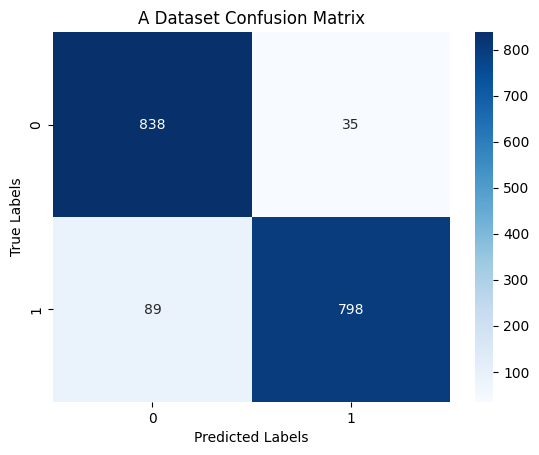

In [ ]:


#YENİ VERİ SETİ DENEMESİ

















import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence", 'loudness',]
# Veri setini yükleme
dataframe = pd.read_csv('out.csv')

# Boş değerleri içeren satırları silme
dataframe.dropna(inplace=True)

dataframe['popularity'] = dataframe['popularity'].apply(lambda x: 1 if x > 50 else 0)

# X ve y ayırma
X = dataframe[features]
y = dataframe['popularity']

# Apply Random Over-sampling to balance the data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBClassifier with the best parameters
classifier = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=1.0)

# Fit the classifier to the training data
classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# ROC AUC score
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('A Dataset (ROC) Curve')
plt.legend()
plt.show()
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('A Dataset Confusion Matrix')
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  4 12:37:19 2023

@author: Tahsin
"""
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Lasso
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
dataframe = pd.read_csv('out.csv')

features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence", 'loudness',"popularity"]

# korelasyon tabanlı feature engineering
dataframe['energy_loudness_ratio'] = dataframe['energy'] / dataframe['loudness']
dataframe['acoustic_energy_ratio'] = dataframe['acousticness'] / dataframe['energy']
dataframe['loudness_instrumentalness_diff'] = abs(dataframe['loudness'] - dataframe['instrumentalness'])
dataframe['energy_instrumentalness_diff'] = abs(dataframe['energy'] - dataframe['instrumentalness'])
dataframe['danceability_energy_diff'] = abs(dataframe['danceability'] - dataframe['energy'])
dataframe['duration_energy_density'] = dataframe['duration_ms'] / dataframe['energy']

'''
energy_loudness_ratio: Bu özellik, enerji değerini ses şiddetiyle (loudness) böler. Enerji değeri yüksek olan parçaların genellikle daha yüksek bir ses şiddeti olduğu düşünülür.

acoustic_energy_ratio: Bu özellik, akustiklik (acousticness) değerini enerjiyle böler. Akustiklik değeri yüksek olan parçaların enerji seviyelerine göre ne kadar akustik olduklarını gösterir.

loudness_instrumentalness_diff: Bu özellik, ses şiddeti ile enstrümantallik (instrumentalness) değeri arasındaki farkı hesaplar. Bu fark, bir parçanın enstrümantal olma derecesi ile ses şiddeti arasındaki ilişkiyi yansıtır.

energy_instrumentalness_diff: Bu özellik, enerji seviyesi ile enstrümantallik değeri arasındaki farkı hesaplar. Bu fark, bir parçanın enstrümantal olma derecesi ile enerji seviyesi arasındaki ilişkiyi gösterir.

danceability_energy_diff: Bu özellik, dans edilebilirlik değerini enerji seviyesinden çıkarır. Bu fark, bir parçanın dans edilebilirlik özelliği ile enerji seviyesi arasındaki ilişkiyi ifade eder.

duration_energy_density: Bu özellik, parça süresini enerji seviyesine böler ve enerji yoğunluğunu temsil eder. Bu özellik, bir parçanın ne kadar süre boyunca enerjik olduğunu ve enerji seviyesinin süre üzerindeki dağılımını gösterir.

'''

#istatistiksel feature engineering
dataframe['mean'] = dataframe[features].mean(axis=1)
dataframe['std'] = dataframe[features].std(axis=1)
dataframe['var'] = dataframe[features].var(axis=1)
dataframe['median'] = dataframe[features].median(axis=1)
dataframe['min'] = dataframe[features].min(axis=1)
dataframe['max'] = dataframe[features].max(axis=1)
dataframe['sum'] = dataframe[features].sum(axis=1)
dataframe['kurtosis'] = dataframe[features].kurtosis(axis=1)
dataframe['skewness'] = dataframe[features].skew(axis=1)
dataframe['zero_crossings'] = (np.diff(np.sign(dataframe[features].values), axis=1) != 0).sum(axis=1)
dataframe['slope_sign_changes'] = (np.diff(np.sign(np.gradient(dataframe[features].values, axis=1)), axis=1) != 0).sum(axis=1)

'''

mean: Özelliklerin ortalama değeri hesaplanır. Her veri noktasının özelliklerine göre ortalama değeri temsil eder.
std: Özelliklerin standart sapması hesaplanır. Her veri noktasının özelliklerine göre standart sapma değeri temsil eder.
var: Özelliklerin varyansı hesaplanır. Her veri noktasının özelliklerine göre varyans değeri temsil eder.
median: Özelliklerin ortanca değeri hesaplanır. Her veri noktasının özelliklerine göre ortanca değeri temsil eder.
min: Özelliklerin minimum değeri hesaplanır. Her veri noktasının özelliklerine göre minimum değeri temsil eder.
max: Özelliklerin maksimum değeri hesaplanır. Her veri noktasının özelliklerine göre maksimum değeri temsil eder.
sum: Özelliklerin toplamı hesaplanır. Her veri noktasının özelliklerine göre toplam değeri temsil eder.
kurtosis: Özelliklerin kurtosis değeri hesaplanır. Kurtosis, özelliklerin dağılımının sivrilik veya basıklık ölçüsünü temsil eder.
skewness: Özelliklerin skewness değeri hesaplanır. Skewness, özelliklerin dağılımının simetrisini temsil eder.
zero_crossings: Özelliklerin sıfır geçiş sayısı hesaplanır. Sıfır geçişleri, veri noktalarında özellik değerinin sıfırdan pozitif veya negatif değere geçişini temsil eder.
slope_sign_changes: Özelliklerin eğim işaret değişiklik sayısı hesaplanır. İşaret değişiklikleri, veri noktalarında özellik değerinin yükselme veya düşme eğiminde işaretin değiştiğini temsil eder.
'''

'''
Bu hesaplamalar, veri setindeki özelliklere ilişkin ek bilgiler elde etmek ve özelliklerin dağılımını, eğilimini veya diğer özelliklerini temsil etmek için kullanılır.
 Bu şekilde, makine öğrenmesi modellerine daha fazla bilgi sağlanabilir veya veri setindeki örüntüler daha iyi anlaşılabilir hale getirilebilir.
'''


# Use the updated dataframe for further analysis
# Tüm özellikleri içeren güncellenmiş dataframe'i kullanarak ilerleyen analizlerde kullanabilirsiniz
dataframe = dataframe[features + ['energy_loudness_ratio', 'acoustic_energy_ratio', 'loudness_instrumentalness_diff', 'energy_instrumentalness_diff', 'danceability_energy_diff', 'duration_energy_density', 'mean', 'std', 'var', 'median', 'min', 'max', 'sum', 'kurtosis', 'skewness', 'zero_crossings', 'slope_sign_changes']]
dataframe = dataframe.replace([np.inf, -np.inf], np.nan).dropna()

data = dataframe

# Split the data into features and target
X = data.drop('popularity', axis=1)  # Replace 'target_column_name' with the actual target column name
y = data['popularity']

# Perform feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Importance ile özellik seçimi
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
selected_indices_rf = np.argsort(importances)[::-1][:5]
selected_features_rf = X.columns[selected_indices_rf]

# Boruta ile özellik seçimi
boruta = BorutaPy(estimator=RandomForestRegressor(), n_estimators='auto', max_iter=25)
boruta.fit(X_train, y_train)
selected_indices_boruta = boruta.support_
selected_features_boruta = X.columns[selected_indices_boruta]

# RFE ile özellik seçimi
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_indices_rfe = rfe.support_
selected_features_rfe = X.columns[selected_indices_rfe]

# Lasso Regression ile özellik seçimi
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_indices_lasso = np.nonzero(lasso.coef_)[0]
selected_features_lasso = X.columns[selected_indices_lasso]

# SelectKBest ile özellik seçimi
kbest = SelectKBest(score_func=f_regression, k=5)
kbest.fit(X_train, y_train)
selected_indices_kbest = kbest.get_support(indices=True)
selected_features_kbest = X.columns[selected_indices_kbest]

# Seçilen özellikleri yazdır
print("Selected Features using Random Forest Importance:")
print(selected_features_rf)
print("\nSelected Features using Boruta:")
print(selected_features_boruta)
print("\nSelected Features using Recursive Feature Elimination (RFE):")
print(selected_features_rfe)
print("\nSelected Features using Lasso Regression:")
print(selected_features_lasso)
print("\nSelected Features using SelectKBest:")
print(selected_features_kbest)


Selected Features using Random Forest Importance:
Index(['speechiness', 'tempo', 'kurtosis', 'skewness', 'valence'], dtype='object')

Selected Features using Boruta:
Index(['acousticness', 'danceability', 'liveness', 'speechiness', 'tempo',
       'valence', 'acoustic_energy_ratio', 'danceability_energy_diff',
       'duration_energy_density', 'mean', 'median', 'sum', 'kurtosis',
       'skewness'],
      dtype='object')

Selected Features using Recursive Feature Elimination (RFE):
Index(['duration_ms', 'tempo', 'mean', 'max', 'sum'], dtype='object')

Selected Features using Lasso Regression:
Index(['danceability', 'energy', 'mode', 'speechiness', 'valence',
       'energy_instrumentalness_diff', 'danceability_energy_diff', 'mean',
       'sum'],
      dtype='object')

Selected Features using SelectKBest:
Index(['duration_ms', 'speechiness', 'mean', 'max', 'sum'], dtype='object')


In [ ]:
tn = float(TN)
fp  = float(FP)
fn = float(FN)
tp = float(TP)
print(tn,fp,fn,tp)

16561.0 829.8 684.8 16416.0


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       357
           1       0.86      0.84      0.85       400

    accuracy                           0.85       757
   macro avg       0.85      0.85      0.85       757
weighted avg       0.85      0.85      0.85       757

false_positive_rate len:  3
k fold true_positive_rate: [0.         0.86410256 1.        ]
k fold false_positive_rate: [0.         0.17166213 1.        ]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       365
           1       0.84      0.84      0.84       392

    accuracy                           0.84       757
   macro avg       0.84      0.84      0.84       757
weighted avg       0.84      0.84      0.84       757

false_positive_rate len:  3
k fold true_positive_rate: [0.         0.84438776 1.        ]
k fold false_positive_rate: [0.         0.16712329 1.        ]
              precision    recall  f1-sc

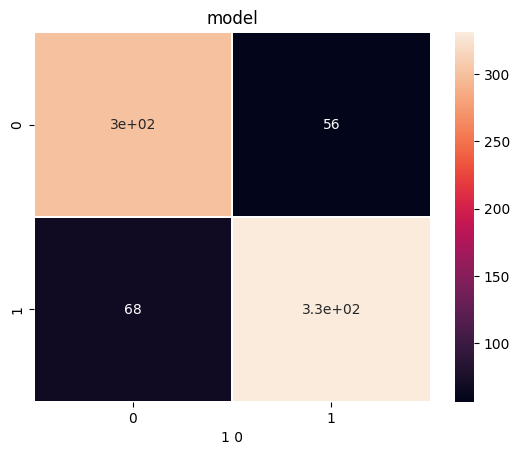

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Load the dataset
dataframe = pd.read_csv('/content/drive/MyDrive/bitirme/new_out2.csv')
popularity_threshold = dataframe['popularity'].median()
dataframe['popularity'] = dataframe['popularity'].apply(lambda x: 1 if x > 61.775 else 0)
X = dataframe.drop('popularity', axis=1)
y = dataframe['popularity']

# Define the XGBClassifier with the best parameters
classifier = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=1.0)

def evaluate_model(model, data_x, data_y):
    k_fold = KFold(5, shuffle=True, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    TN = np.array([])
    TP = np.array([])
    FP = np.array([])
    FN = np.array([])
    F1_Score = np.array([])
    Recal_Score = np.array([])

    Train_ACC =np.array([])
    Test_ACC = np.array([])

    Precision_Score = np.array([])
    Train_Times = np.array([])
    Test_Times = np.array([])

    AUCS = np.array([])

    false_positive_rates = np.array([])
    true_positive_rates = np.array([])
    FPR1 = np.array([])
    FPR2 = np.array([])
    FPR3 = np.array([])

    TPR1 = np.array([])
    TPR2 = np.array([])
    TPR3 = np.array([])

    A_class_0_precision =  np.array([])
    A_class_0_recall =  np.array([])
    A_class_0_f1_score =  np.array([])
    A_class_0_support =  np.array([])
    A_class_1_precision =  np.array([])
    A_class_1_recall =  np.array([])
    A_class_1_f1_score =  np.array([])
    A_class_1_support =  np.array([])
    A_clf_report_acc = np.array([])
    A_class_macro_avg_precision =  np.array([])
    A_class_macro_avg_recall =  np.array([])
    A_class_macro_avg_f1_score =  np.array([])
    A_class_macro_avg_support =  np.array([])
    A_class_weighted_avg_precision =  np.array([])
    A_class_weighted_avg_recall =  np.array([])
    A_class_weighted_avg_f1_score =  np.array([])
    A_class_weighted_avg_support =  np.array([])




    train_x = []
    train_y = []
    test_x = []
    test_y = []



    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x.iloc[train_ix], data_y.iloc[train_ix], data_x.iloc[test_ix], data_y.iloc[test_ix]

        # Fit the classifier
        t0 = time.time()
        classifier = model.fit(train_x, train_y)
        train_time = time.time() - t0

        # Predict the labels of the test set samples
        t0 = time.time()
        predicted_labels = classifier.predict(test_x)
        test_time = time.time() - t0
        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

        target_names = ['class_0','class_1']
        clf_rept = classification_report(predicted_labels, test_y, output_dict=True)
        print(classification_report(predicted_labels, test_y))

        class_0_precision =  clf_rept['0']['precision']
        class_0_recall =  clf_rept['0']['recall']
        class_0_f1_score =  clf_rept['0']['f1-score']
        class_0_support =  clf_rept['0']['support']

        class_1_precision =  clf_rept['1']['precision']
        class_1_recall =  clf_rept['1']['recall']
        class_1_f1_score =  clf_rept['1']['f1-score']
        class_1_support =  clf_rept['1']['support']

        clf_report_acc = clf_rept['accuracy']

        class_macro_avg_precision =  clf_rept['macro avg']['precision']
        class_macro_avg_recall =  clf_rept['macro avg']['recall']
        class_macro_avg_f1_score =  clf_rept['macro avg']['f1-score']
        class_macro_avg_support =  clf_rept['macro avg']['support']

        class_weighted_avg_precision =  clf_rept['weighted avg']['precision']
        class_weighted_avg_recall =  clf_rept['weighted avg']['recall']
        class_weighted_avg_f1_score =  clf_rept['weighted avg']['f1-score']
        class_weighted_avg_support =  clf_rept['weighted avg']['support']

        #add to

        A_class_0_precision = np.append(A_class_0_precision,class_0_precision)
        A_class_0_recall = np.append(A_class_0_recall,class_0_recall)
        A_class_0_f1_score = np.append(A_class_0_f1_score,class_0_f1_score)
        A_class_0_support = np.append(A_class_0_support,class_0_support)

        A_class_1_precision = np.append(A_class_1_precision,class_1_precision)
        A_class_1_recall = np.append(A_class_1_recall,class_1_recall)
        A_class_1_f1_score = np.append(A_class_1_f1_score,class_1_f1_score)
        A_class_1_support = np.append(A_class_1_support,class_1_support)

        A_clf_report_acc = np.append(A_clf_report_acc,clf_report_acc)

        A_class_macro_avg_precision = np.append(A_class_macro_avg_precision,class_macro_avg_precision)
        A_class_macro_avg_recall = np.append(A_class_macro_avg_recall,class_macro_avg_recall)
        A_class_macro_avg_f1_score = np.append(A_class_macro_avg_f1_score,class_macro_avg_f1_score)
        A_class_macro_avg_support = np.append(A_class_macro_avg_support,class_macro_avg_support)


        A_class_weighted_avg_precision = np.append(A_class_weighted_avg_precision,class_weighted_avg_precision)
        A_class_weighted_avg_recall = np.append(A_class_weighted_avg_recall,class_weighted_avg_recall)
        A_class_weighted_avg_f1_score = np.append(A_class_weighted_avg_f1_score,class_weighted_avg_f1_score)
        A_class_weighted_avg_support = np.append(A_class_weighted_avg_support,class_weighted_avg_support)




        tn, fp, fn, tp = confusion_matrix(predicted_labels, test_y).ravel()

        f1 = f1_score(test_y, predicted_labels,average='micro')

        recall = recall_score(test_y, predicted_labels)

        test_Acc = accuracy_score(test_y, predicted_labels)
        precisionScore = precision_score(test_y, predicted_labels)
        #train acc
        trainPred = classifier.predict(train_x)
        train_acc = accuracy_score(trainPred, train_y)

        auc = metrics.roc_auc_score(test_y, predicted_labels)


        false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(test_y, predicted_labels)


        print('false_positive_rate len: ',len(false_positive_rate))
        print("k fold true_positive_rate:", true_positive_rate)
        print("k fold false_positive_rate:", false_positive_rate)

        fpr1 = false_positive_rate[0]


        fpr2 = false_positive_rate[1]
        try:
          fpr3 = false_positive_rate[2]
          FPR3 = np.append(FPR3,fpr3)
        except:
          print(1)

        #print(fpr1,fpr2,fpr3)


        tpr1 = true_positive_rate[0]
        tpr2 = true_positive_rate[1]
        try:
          tpr3 = true_positive_rate[2]
          TPR3 = np.append(TPR3,tpr3)
        except:
          print(1)


        FPR1 = np.append(FPR1,fpr1)
        FPR2 = np.append(FPR2,fpr2)


        TPR1 = np.append(TPR1,tpr1)
        TPR2 = np.append(TPR2,tpr2)



        F1_Score = np.append(F1_Score, f1)
        Recal_Score = np.append(Recal_Score,recall)
        Train_ACC = np.append(Train_ACC,train_acc)
        Test_ACC = np.append(Test_ACC,test_Acc)
        Precision_Score = np.append(Precision_Score,precisionScore)
        TN = np.append(TN, tn)
        TP = np.append(TP, tp)
        FN = np.append(FN, fn)
        FP = np.append(FP, fp)


        AUCS = np.append(AUCS,auc)
        false_positive_rates = np.append(false_positive_rates,false_positive_rate)
        true_positive_rates = np.append(true_positive_rates,true_positive_rate)


    TP = (np.mean(TP))
    TN = (np.mean(TN))
    FP = (np.mean(FP))
    FN = (np.mean(FN))
    print('test: ',Test_ACC)
    print('F1_Score: ',F1_Score)
    print('Recal_Score: ',Recal_Score)
    print('Train_ACC: ',Train_ACC)
    print('Precision_Score: ',Precision_Score)
    F1_Score = (np.mean(F1_Score))
    Recal_Score = (np.mean(Recal_Score))
    Train_ACC = (np.mean(Train_ACC))

    Test_ACC = (np.mean(Test_ACC))
    Precision_Score = np.mean(Precision_Score)

    AUCS = np.mean(AUCS)
    FPR1 = np.mean(FPR1)
    FPR2 = np.mean(FPR2)

    TPR1 = np.mean(TPR1)
    TPR2 = np.mean(TPR2)

    A_class_0_precision =  np.mean(A_class_0_precision)
    A_class_0_recall =  np.mean(A_class_0_recall)
    A_class_0_f1_score =  np.mean(A_class_0_f1_score)
    A_class_0_support =  np.mean(A_class_0_support)
    A_class_1_precision =  np.mean(A_class_1_precision)
    A_class_1_recall =  np.mean(A_class_1_recall)
    A_class_1_f1_score =  np.mean(A_class_1_f1_score)
    A_class_1_support =  np.mean(A_class_1_support)
    A_clf_report_acc = np.mean(A_clf_report_acc)
    A_class_macro_avg_precision =  np.mean(A_class_macro_avg_precision)
    A_class_macro_avg_recall =  np.mean(A_class_macro_avg_recall)
    A_class_macro_avg_f1_score =  np.mean(A_class_macro_avg_f1_score)
    A_class_macro_avg_support =  np.mean(A_class_macro_avg_support)
    A_class_weighted_avg_precision =  np.mean(A_class_weighted_avg_precision)
    A_class_weighted_avg_recall =  np.mean(A_class_weighted_avg_recall)
    A_class_weighted_avg_f1_score =  np.mean(A_class_weighted_avg_f1_score)
    A_class_weighted_avg_support =  np.mean(A_class_weighted_avg_support)

    try:

      TPR3 = np.mean(TPR3)
      FPR3 = np.mean(FPR3)
      false_positive_rates = np.array([FPR1,FPR2,FPR3])
      true_positive_rates = np.array([TPR1,TPR2,TPR3])

    except:
      print(1)
      false_positive_rates = np.array([FPR1,FPR2])
      true_positive_rates = np.array([TPR1,TPR2])



    return TN, TP, FN, FP, F1_Score, Recal_Score, Train_ACC, Test_ACC, Precision_Score, AUCS, false_positive_rates, true_positive_rates,A_class_0_precision,A_class_0_recall ,A_class_0_f1_score,A_class_0_support ,A_class_1_precision,A_class_1_recall ,A_class_1_f1_score,A_class_1_support,A_clf_report_acc ,A_class_macro_avg_precision,A_class_macro_avg_recall,A_class_macro_avg_f1_score,A_class_macro_avg_support,A_class_weighted_avg_precision,A_class_weighted_avg_recall,A_class_weighted_avg_f1_score,A_class_weighted_avg_support





TN, TP, FN, FP, F1_Score, Recal_Score, Train_ACC, Test_ACC, Precision_Score, AUCS, false_positive_rates, true_positive_rates,A_class_0_precision,A_class_0_recall ,A_class_0_f1_score,A_class_0_support ,A_class_1_precision,A_class_1_recall ,A_class_1_f1_score,A_class_1_support,A_clf_report_acc ,A_class_macro_avg_precision,A_class_macro_avg_recall,A_class_macro_avg_f1_score,A_class_macro_avg_support,A_class_weighted_avg_precision,A_class_weighted_avg_recall,A_class_weighted_avg_f1_score,A_class_weighted_avg_support  = evaluate_model(classifier, X, y)


print("false_positive_rates: ",false_positive_rates)
print("true_positive_rates: ",true_positive_rates)
print("mean f1: ",F1_Score)
print("mean Recal_Score: ",Recal_Score)
print("mean Train_ACC: ",Train_ACC)
print("mean Test_ACC: ",Test_ACC)
print("mean Precision_Score: ",Precision_Score)
rocs = []
rocs.append([ 'model' ,AUCS, false_positive_rates, true_positive_rates])
cfmatrix2 = np.array([[TN,FP],[FN,TP]])
import seaborn as sns
sns.heatmap(cfmatrix2, annot=True, linewidths = 0.01)
plt.title(str('model'))
plt.xlabel('1 0')
plt.show()



In [ ]:
tn = float(TN)
fp  = float(FP)
fn = float(FN)
tp = float(TP)
print(tn,fp,fn,tp)

300.8 56.4 68.0 331.2


In [ ]:
print("Class 0 Precision:", A_class_0_precision)
print("Class 0 Recall:", A_class_0_recall)
print("Class 0 F1 Score:", A_class_0_f1_score)
print("Class 0 Support:", A_class_0_support)
print("Class 1 Precision:", A_class_1_precision)
print("Class 1 Recall:", A_class_1_recall)
print("Class 1 F1 Score:", A_class_1_f1_score)
print("Class 1 Support:", A_class_1_support)
print("Classifier Report Accuracy:", A_clf_report_acc)
print("Macro Avg Precision:", A_class_macro_avg_precision)
print("Macro Avg Recall:", A_class_macro_avg_recall)
print("Macro Avg F1 Score:", A_class_macro_avg_f1_score)
print("Macro Avg Support:", A_class_macro_avg_support)
print("Weighted Avg Precision:", A_class_weighted_avg_precision)
print("Weighted Avg Recall:", A_class_weighted_avg_recall)
print("Weighted Avg F1 Score:", A_class_weighted_avg_f1_score)
print("Weighted Avg Support:", A_class_weighted_avg_support)


Class 0 Precision: 0.8155947576068467
Class 0 Recall: 0.8418707317797519
Class 0 F1 Score: 0.8283964331702833
Class 0 Support: 357.2
Class 1 Precision: 0.8546329523178258
Class 1 Recall: 0.8297928231773548
Class 1 F1 Score: 0.8419154934454698
Class 1 Support: 399.2
Classifier Report Accuracy: 0.8355329097733325
Macro Avg Precision: 0.8351138549623363
Macro Avg Recall: 0.8358317774785533
Macro Avg F1 Score: 0.8351559633078764
Macro Avg Support: 756.4
Weighted Avg Precision: 0.836358128520428
Weighted Avg Recall: 0.8355329097733325
Weighted Avg F1 Score: 0.8356304806091917
Weighted Avg Support: 756.4


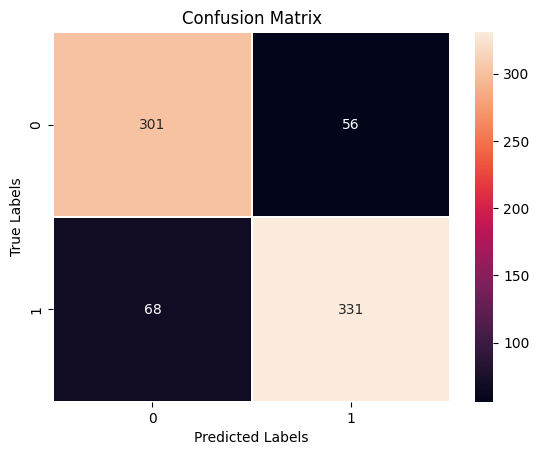

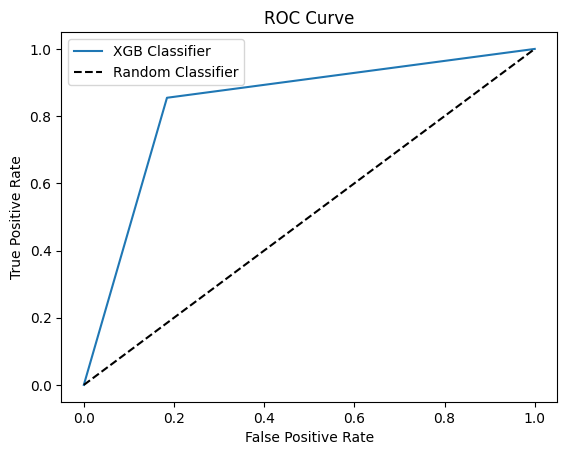

In [ ]:
cfmatrix2 = np.array([[301,56],[68,331]])
import seaborn as sns
sns.heatmap(cfmatrix2, annot=True,  fmt="d", linewidths = 0.01)
plt.title(str('Confusion Matrix'))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



plt.plot(false_positive_rates, true_positive_rates, label='XGB Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Sınıf sayıları (önce):
1    1938
0    1844
Name: popularity, dtype: int64
Accuracy (Fold 1): 0.848387
Accuracy (Fold 2): 0.803226
Accuracy (Fold 3): 0.825806
Accuracy (Fold 4): 0.819355
Accuracy (Fold 5): 0.808065
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       388
           1       0.85      0.83      0.84       388

    accuracy                           0.84       776
   macro avg       0.84      0.84      0.84       776
weighted avg       0.84      0.84      0.84       776

Confusion Matrix:
[[330  58]
 [ 67 321]]
ROC AUC Score: 0.9273169305983633


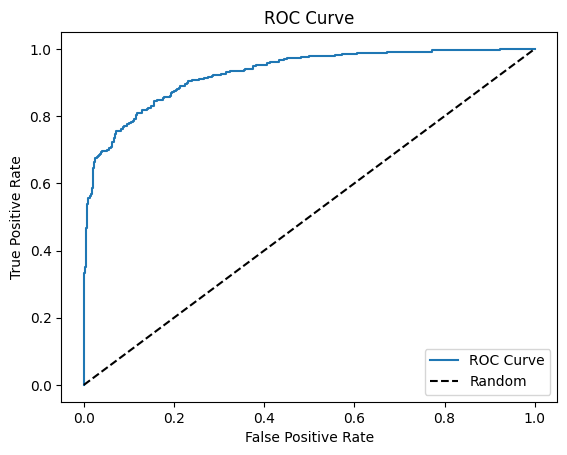

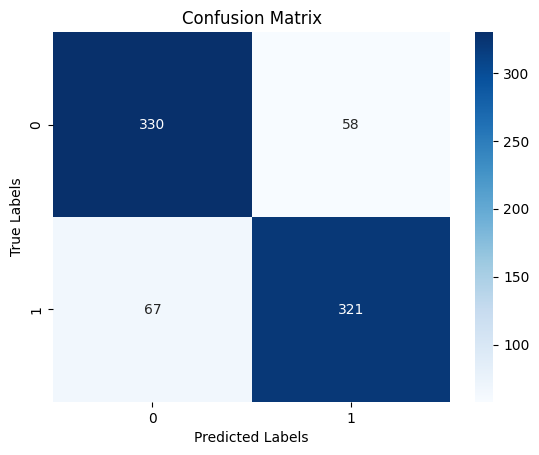

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataframe = pd.read_csv('/content/drive/MyDrive/bitirme/new_out2.csv')
popularity_threshold = dataframe['popularity'].median()
dataframe['popularity'] = dataframe['popularity'].apply(lambda x: 1 if x > 61.775 else 0)
X = dataframe.drop('popularity', axis=1)
y = dataframe['popularity']

# Apply SMOTE oversampling to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Sınıf sayılarını belirtme
print("Sınıf sayıları (önce):")
print(dataframe['popularity'].value_counts())

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBClassifier with the best parameters
classifier = XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=300, subsample=1.0)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5)

# Print the accuracy scores for each fold
for fold, score in enumerate(scores, 1):
    print(f"Accuracy (Fold {fold}): {score:.6f}")

# Fit the classifier to the training data
classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test_scaled)

# Classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# ROC AUC score
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", auc_score)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
